# Naive Bayes Classification

### by S Vishakan, CSE-C, 18 5001 196

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, accuracy_score

In [2]:
file = "seeds_dataset.csv"
df = pd.read_csv(file, names = ["Area", "Perimeter", "Compactness", "Length of kernel", "Width of kernel", "Asymmetry coefficient", "Length of kernel groove", "Class"])

In [3]:
df.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
df.describe()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


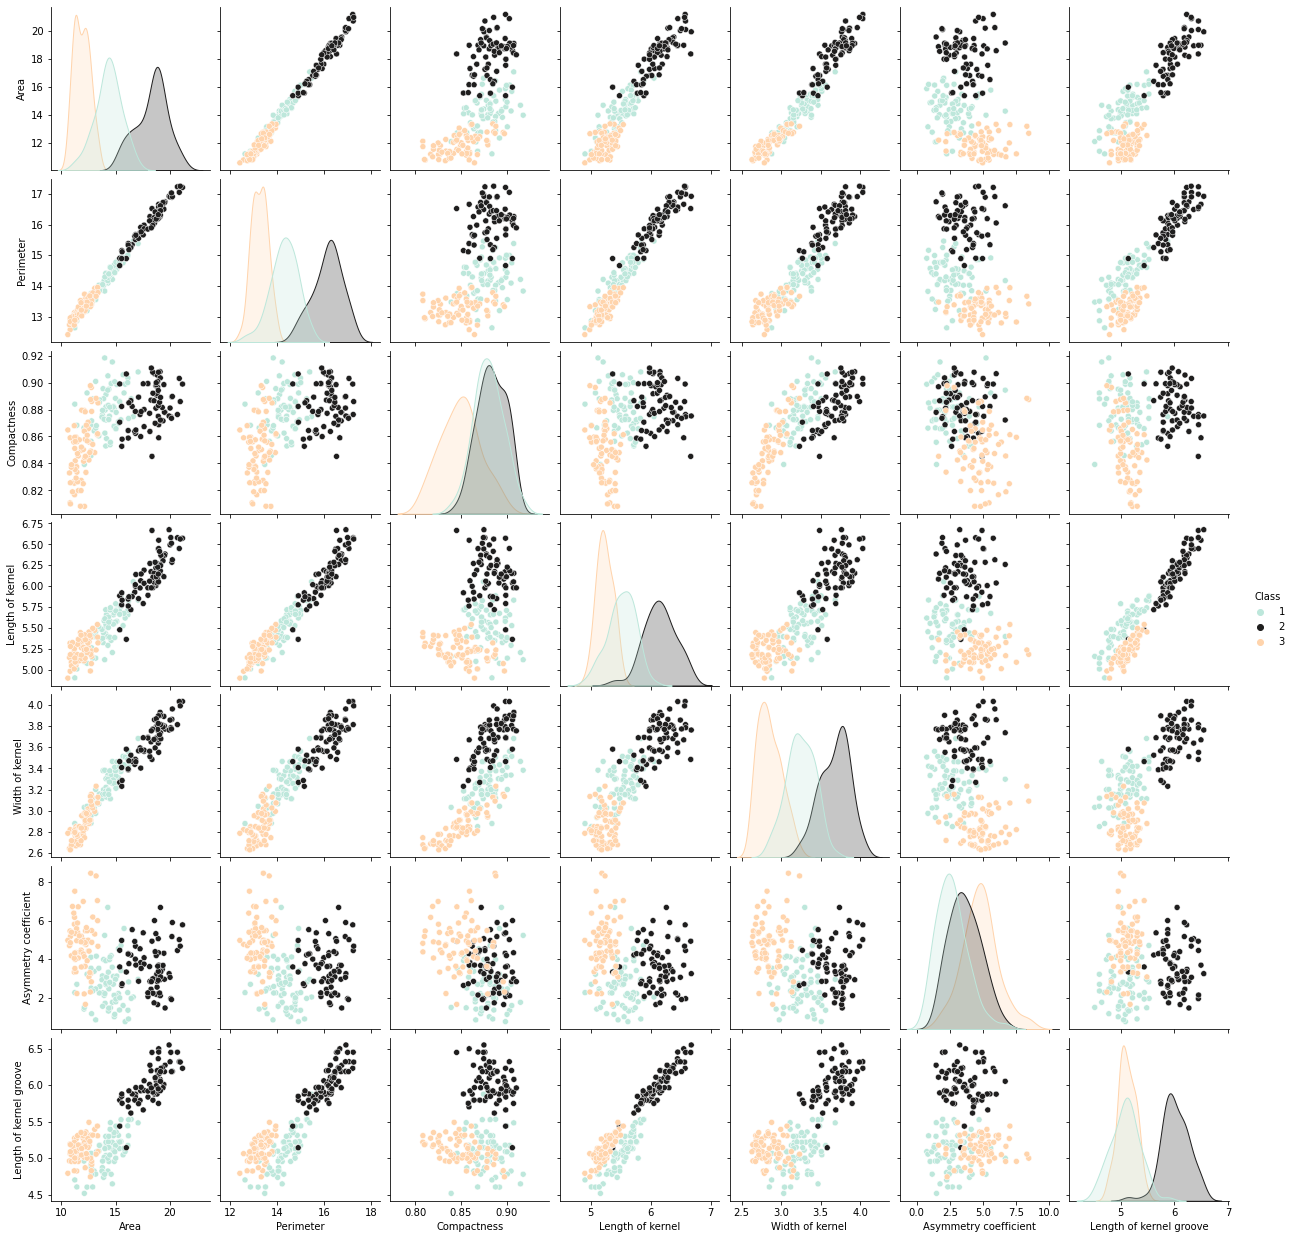

In [5]:
sns.pairplot(df, hue='Class', palette='icefire')

In [6]:
df["Class"].value_counts()

3    70
2    70
1    70
Name: Class, dtype: int64

In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [10]:
y_pred = gnb.predict(x_test)

In [11]:
print(confusion_matrix(y_test, y_pred))

[[16  1  0]
 [ 5 16  0]
 [ 0  0 15]]


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.76      0.94      0.84        17
           2       0.94      0.76      0.84        21
           3       1.00      1.00      1.00        15

    accuracy                           0.89        53
   macro avg       0.90      0.90      0.89        53
weighted avg       0.90      0.89      0.89        53



In [13]:
acc = round(accuracy_score(y_test, y_pred) * 100, 2)
print("Accuracy Score:", acc, "%")

Accuracy Score: 88.68 %


In [14]:
bas = round(balanced_accuracy_score(y_test, y_pred) * 100, 2)
print("Balanced Accuracy Score:", bas, "%")

Balanced Accuracy Score: 90.1 %
